# 01. Знакомство с `torch.Tensor`

V 0.1 04.02.2021

---

При решении данных задач не подразумевается использования циклов или генераторов Python, если в задании не сказано обратного. Решение должно опираться на использование функционала библиотеки `torch`.

[PyTorch documentation](https://pytorch.org/docs/stable/#pytorch-documentation)

In [1]:
import torch
import numpy as np

## 1.1 Создание тензоров и выполнение базовых операций над ними

[Документация по функциям для создания тензоров](https://pytorch.org/docs/stable/torch.html#creation-ops)

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.1.1 Создайте двумерный тензор размера (8, 8). Используя как можно меньше операций, добейтесь расстановки кодов "шахматных фигур".

Ожидаемый результат:

```
[[-4., -3., -2., -6., -5., -2., -3., -4.],
 [-1., -1., -1., -1., -1., -1., -1., -1.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [0., 0., 0., 0., 0., 0., 0., 0.],
 [1., 1., 1., 1., 1., 1., 1., 1.],
 [4., 3., 2., 6., 5., 2., 3., 4.]]

```

In [3]:
tensor = torch.zeros(8, 8)
tensor[7] = torch.tensor([4., 3., 2., 6., 5., 2., 3., 4.])
tensor[6] = torch.ones(1, 8)
tensor[0] = tensor[7]*(-1)
tensor[1] = tensor[6]*(-1)
tensor

tensor([[-4., -3., -2., -6., -5., -2., -3., -4.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 4.,  3.,  2.,  6.,  5.,  2.,  3.,  4.]])

1.1.2 Средствами `torch` рассчитать произведения четных чисел от 2 до 20 на ближайшие к ним бОльшие нечетные числа.

In [4]:
torch.arange(2,22,2)*torch.arange(3,23,2)

tensor([  6,  20,  42,  72, 110, 156, 210, 272, 342, 420])

1.1.3 Создать тензор размера 11x7 вида: [[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]

In [5]:
torch.arange(0,7).repeat(11, 1)+torch.transpose(torch.arange(1,110, 10).repeat(7, 1), 0, 1)

tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.1.4 Написать функцию, которая для целых значений `n` и `m` будет возвращать тензор размера `n`x`m`, заполненный текстурой размера 2x2, состоящей из следующих значений:

```
0 1

2 3

```

Пример для n = 4 и m = 5:

```
0 1 0 1 0

2 3 2 3 2

0 1 0 1 0

2 3 2 3 2
```

In [6]:
def tekstura(n, m):
  tec = torch.tensor([[0, 1], [2, 3]])
  return tec.repeat(n//2+1, m//2+1)[:n, :m]

tekstura(4, 5)

tensor([[0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2],
        [0, 1, 0, 1, 0],
        [2, 3, 2, 3, 2]])

1.1.5 Сгенерировать двумерный тензор `t` размерности (4, 7), состоящий из случайных действительных чисел, равномерно распределенных в дипазоне от 0 до 20. Нормализовать значения массива с помощью преобразования вида $ax+b$ так, что после нормализации максимальный элемент масива будет равен 1.0, минимальный 0.0

[Random Sampling](https://pytorch.org/docs/stable/torch.html#random-sampling)

[Distributions](https://pytorch.org/docs/stable/distributions.html)

In [7]:
t = torch.FloatTensor(4, 7).uniform_(0, 20)
t = t-torch.min(t)
t/torch.max(t)

tensor([[0.3644, 0.9950, 0.7147, 0.7925, 0.6250, 0.6144, 0.4855],
        [0.1975, 0.3530, 1.0000, 0.1237, 0.4221, 0.2519, 0.0543],
        [0.1869, 0.1538, 0.9100, 0.6910, 0.4047, 0.0000, 0.2889],
        [0.6461, 0.3601, 0.3033, 0.1445, 0.2651, 0.2594, 0.5206]])

1.1.6 Задать два двумерных тензора `ar1` и `ar2` размерности (4, 7), состоящих из случайных целых чисел в пределах от 0 до 10. Построить двумерный тензор размерности (4, 7), каждый элемент которого представляет собой максимум из двух значений, находящихся на аналогичной позиции в тензорах `ar1`, `ar2`.

[Reductions ops](https://pytorch.org/docs/stable/torch.html#reduction-ops)

In [8]:
ar1 = torch.randint(0, 11, [4, 7])
ar2 = torch.randint(0, 11, [4, 7])
print(ar1)
print(ar2)
torch.max(ar1, ar2)

tensor([[9, 8, 9, 7, 8, 6, 7],
        [2, 7, 1, 0, 1, 1, 0],
        [8, 7, 7, 5, 0, 7, 4],
        [1, 3, 8, 5, 8, 7, 5]])
tensor([[ 9,  5,  7,  9,  4, 10,  2],
        [ 0,  9,  5,  6,  9,  3, 10],
        [ 0,  3,  8,  8,  4,  6,  7],
        [ 3,  0, 10,  2,  4,  2,  9]])


tensor([[ 9,  8,  9,  9,  8, 10,  7],
        [ 2,  9,  5,  6,  9,  3, 10],
        [ 8,  7,  8,  8,  4,  7,  7],
        [ 3,  3, 10,  5,  8,  7,  9]])

1.1.7 Создать тензор из 20 случайных целых чисел от 0 до 100. Получить второе сверху значение в тензоре. Определить индекс этого значения.

In [9]:
ar = torch.randint(0, 101, [20])
print(ar)
torch.topk(ar, 2).indices[1]

tensor([50, 41, 67, 46, 10, 44, 96, 12, 30,  1,  4, 16, 50, 90, 80, 66, 66,  0,
         0, 76])


tensor(13)

## 1.2 Распространение

[Numpy broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Torch broadcasting](https://pytorch.org/docs/stable/notes/broadcasting.html)

1.2.1 Создать тензор 11x7 вида: `[[1, 2, 3, ..., 7], [11, 12, 13, ..., 17], [21, 22, 23, ..., 27], ..., [101, 102, 103, ..., 107]]`. При решении задачи применить технику распространения.

In [10]:
torch.arange(1,8)+torch.arange(0,110, 10)[:, np.newaxis]


tensor([[  1,   2,   3,   4,   5,   6,   7],
        [ 11,  12,  13,  14,  15,  16,  17],
        [ 21,  22,  23,  24,  25,  26,  27],
        [ 31,  32,  33,  34,  35,  36,  37],
        [ 41,  42,  43,  44,  45,  46,  47],
        [ 51,  52,  53,  54,  55,  56,  57],
        [ 61,  62,  63,  64,  65,  66,  67],
        [ 71,  72,  73,  74,  75,  76,  77],
        [ 81,  82,  83,  84,  85,  86,  87],
        [ 91,  92,  93,  94,  95,  96,  97],
        [101, 102, 103, 104, 105, 106, 107]])

1.2.2 Вычесть одномерный тензор `b_1d` из двухмерного тензора `a_2d`, так, чтобы каждый элемент одномерного тензора вычитался из всех элементов соответствующих строк двумерного тензора.

_Пример:_

Для входа:
```python
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
```

Ожидается резульат:

```python
[[2 2 2]
 [2 2 2]
 [2 2 2]]
```

In [11]:
a_2d = torch.tensor([[3,3,3],[4,4,4],[5,5,5]])
b_1d = torch.tensor([1,2,3])
a_2d-b_1d[:, np.newaxis]

tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])

## 1.3 Индексы, маскирование и прихотливое индексирование

[Документация по функциям для работы с индексами](https://pytorch.org/docs/stable/torch.html#indexing-slicing-joining-mutating-ops)

1.3.1 Получить индексы, для которых элементы тензоров `a` и `b` совпадают.

_Пример:_

Для входа:
```python
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
```

Ожидается резульат:

```python
tensor([1, 3, 5, 7])
```

In [12]:
a = torch.tensor([1,2,3,2,3,4,3,4,5,6])
b = torch.tensor([7,2,10,2,7,4,9,4,9,8])
torch.argwhere(a==b).flatten()

tensor([1, 3, 5, 7])

1.3.2 Инвертировать порядок элементов в двумерном тензоре `torch.arange(9).view(3,3)`.

Ожидаемый результат:


```python
tensor([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])
```

In [13]:
torch.flip(torch.arange(9).view(3,3), [0, 1])


tensor([[8, 7, 6],
        [5, 4, 3],
        [2, 1, 0]])

1.3.3 Из входного тензора a получить только элементы, находящиеся в диапазоне от 5 до 10.

_Пример:_

Для входа:
```python
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
```

Ожидается результат:

```python
tensor([6, 9, 10])
```

In [14]:
a = torch.tensor([2, 6, 1, 9, 10, 3, 27])
a[(a>=5) & (a<=10)]

tensor([ 6,  9, 10])

1.3.4 Поменять местами столбец 1 и 2 тензора `torch.arange(9).reshape(3,3)`

In [15]:
a = torch.arange(9).reshape(3,3)
print(a)
s1 = a[:,0].clone()
a[:,0] = a[:,1]
a[:,1] = s1
a

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


tensor([[1, 0, 2],
        [4, 3, 5],
        [7, 6, 8]])

1.3.5 Создать тензор 8 на 10 из случайных целых чисел из диапазона от 0 до 10 и найти в ней строку (ее индекс и вывести саму строку), в которой сумма значений минимальна.

In [16]:
ar = torch.randint(0, 11, [8, 10])
print(ar)
ind = ar.sum(1).argmin()
print(ind)
print(ar[ind])

tensor([[ 6,  6,  3,  1,  8,  8,  2,  2,  6,  6],
        [ 7, 10,  0,  3, 10,  3,  0,  6,  7,  3],
        [ 3,  0,  1,  6,  1, 10,  1,  4,  0,  4],
        [ 5,  2,  7,  9,  4,  2,  5,  1,  1,  0],
        [ 2,  6,  3,  0,  6,  5,  6,  6, 10,  6],
        [ 8,  5,  7,  0,  3,  9, 10,  1,  9,  8],
        [ 1,  4,  4,  5,  5,  4,  6,  9,  6,  6],
        [ 8,  2,  3,  5,  0,  9,  3,  3,  1,  4]])
tensor(2)
tensor([ 3,  0,  1,  6,  1, 10,  1,  4,  0,  4])


1.3.6 Cоздать тензор из 20 случайных целых чисел от 0 до 100. Обрезать значения тензора (заменить значения, выходящие за диапазон, на крайние значения) снизу по значению 30, сверху по значению 70.

In [17]:
ar = torch.randint(0, 101, [20])
print(ar)
ar[ar<30]=30
ar[ar>70]=70
ar

tensor([33, 27, 85,  3, 80, 17, 36, 28, 31, 65, 76, 45, 38, 93, 89, 57, 79, 79,
        84, 44])


tensor([33, 30, 70, 30, 70, 30, 36, 30, 31, 65, 70, 45, 38, 70, 70, 57, 70, 70,
        70, 44])

1.3.7 Создать два тензора размера 30 на 3 из случайных целых чисел из диапазона от 0 до 10 и найти все значения первого тензора, которые больше соответсвующих (по расположению) значений второго тензора. Подсчитать сумму этих значений.

In [18]:
ar1 = torch.randint(0, 11, [30, 3])
ar2 = torch.randint(0, 11, [30, 3])
ar1[ar1>ar2].sum()

tensor(346)

1.3.8 При помощи прихотливого индексирования для двухмерного массива размерности (20, 20), состоящего из случайных целых чисел в пределах от 0 до 10 получить массив элементов находящихся на диагонали, проходящей над основной диагональю.

In [19]:
ar1 = torch.randint(0, 11, [20, 20])
print(ar1)
ind = torch.arange(19)
ar1[ind, ind+1]

tensor([[ 6,  7,  6,  4,  7,  7,  2,  6,  3,  1, 10,  3,  0, 10,  6,  7,  9,  9,
          3,  3],
        [ 1,  8,  9,  8,  5,  1,  7,  4,  4,  2,  6,  7,  5,  3,  7,  7,  1, 10,
          2,  3],
        [ 9,  4,  0,  9,  4,  6,  4,  8,  1,  9,  7,  6,  4,  0,  2, 10,  8,  4,
          6,  1],
        [ 2,  9,  4,  7,  7,  8,  8,  7,  4, 10,  3,  7,  4, 10,  6,  1,  8,  1,
          1,  1],
        [ 3,  2,  7,  4,  2,  0,  9,  3,  0,  5,  1,  4, 10,  2,  1,  4, 10,  2,
          7,  9],
        [ 6, 10,  6,  5, 10,  3,  1,  3,  2,  4,  8,  8,  9,  5,  7,  5,  5,  8,
          3,  6],
        [ 0,  7,  6,  7,  4,  1,  6,  0,  3,  1,  5,  7,  3,  4,  6,  7,  7,  1,
          4,  3],
        [ 0,  7,  7,  9,  8,  9,  4,  8,  5, 10, 10,  3, 10, 10,  8, 10,  4, 10,
          8,  4],
        [10,  8, 10,  2,  2,  0,  2,  9,  8,  9,  1,  9,  0,  1,  3, 10,  5,  4,
          7,  4],
        [ 7,  6,  1,  6,  1,  2,  5,  0, 10,  2,  8,  3,  8,  0,  6,  0,  5,  4,
         10,  8],
        [ 

tensor([7, 9, 9, 7, 0, 1, 0, 5, 9, 8, 1, 3, 3, 8, 5, 8, 5, 5, 4])

1.3.9 Задать два двухмерных тензора `ar1` и `ar2` размерности (5, 10), состоящих из случайных целых чисел в пределах от 0 до 10. Удвоить все значения `ar1`, которые совпадают со значениями `ar2`, расположенными на аналогичных позициях.

In [20]:
ar1 = torch.randint(0, 11, [5, 10])
ar2 = torch.randint(0, 11, [5, 10])
print(ar1)
print(ar2)
ar1[ar1==ar2] = ar1[ar1==ar2]*2
print(ar1)

tensor([[ 2,  3,  1, 10,  3,  7,  8,  3,  3, 10],
        [10,  7,  3,  0, 10,  3,  6,  9,  4,  3],
        [ 8,  7,  6,  5,  6,  2,  9,  5,  1,  4],
        [ 1,  6, 10,  6,  9,  4,  5,  7,  6,  3],
        [ 4,  0,  8,  2,  1,  1,  9,  2,  8,  6]])
tensor([[ 7,  2,  7, 10,  4,  9,  9,  2,  4,  9],
        [ 5,  6,  4,  2,  5,  2,  4,  7,  5,  2],
        [ 6,  3,  9,  0,  0,  7,  5,  2,  7,  2],
        [ 4,  2, 10,  3,  2,  2,  8,  0,  1, 10],
        [ 5,  5,  7,  8, 10,  0,  4,  1,  8, 10]])
tensor([[ 2,  3,  1, 20,  3,  7,  8,  3,  3, 10],
        [10,  7,  3,  0, 10,  3,  6,  9,  4,  3],
        [ 8,  7,  6,  5,  6,  2,  9,  5,  1,  4],
        [ 1,  6, 20,  6,  9,  4,  5,  7,  6,  3],
        [ 4,  0,  8,  2,  1,  1,  9,  2, 16,  6]])


1.3.10 Заданы три двухмерных тензора `ar1`, `ar2` и `ar3` размерности (4, 7), состоящие из случайных целых чисел в пределах от 0 до 10. Обнулить все элементы `ar1`, которые больше соответствующих (находящихся в соответствующих позициях) элементов `ar2` и меньше соответствующих элементов `ar3`.

In [21]:
ar1 = torch.randint(0, 11, [4, 7])
ar2 = torch.randint(0, 11, [4, 7])
ar3 = torch.randint(0, 11, [4, 7])
print(ar1)
print(ar2)
print(ar3)
ar1[(ar1>ar2)&(ar1<ar3)] = 0
print(ar1)

tensor([[ 8,  0,  4, 10,  7,  3,  8],
        [ 2,  4,  5, 10,  4,  1,  8],
        [ 1, 10,  2,  7,  1,  4,  6],
        [ 0,  2,  2,  5,  1,  9,  0]])
tensor([[10,  7, 10,  3,  8,  1,  2],
        [ 1,  8,  6,  0,  4,  9,  3],
        [ 9,  0,  8,  6,  7,  3,  0],
        [ 9,  7,  9,  1,  3, 10,  1]])
tensor([[ 7,  7,  4,  8,  1,  8,  3],
        [ 3,  2,  6,  5,  5,  3,  3],
        [ 4, 10,  5,  3,  1,  8,  1],
        [ 3, 10, 10,  4,  2,  4,  7]])
tensor([[ 8,  0,  4, 10,  7,  0,  8],
        [ 0,  4,  5, 10,  4,  1,  8],
        [ 1, 10,  2,  7,  1,  0,  6],
        [ 0,  2,  2,  5,  1,  9,  0]])


1.3.11 Задан двумерный тензор `ar1` размерности (20, 5), состоящий из случайных целых чисел в пределах от 0 до 20. Определить, в каких столбцах не менее 5 раз встречается значение, максимальное по своей строке.

In [22]:
ar1 = torch.randint(0, 21, [20, 5])
print(ar1)
torch.argwhere(torch.bincount(ar1.max(1).indices)>=5).flatten()

tensor([[16,  4,  5, 10, 14],
        [14,  2,  1,  9,  1],
        [19,  6, 12, 15, 11],
        [17,  7,  3,  5, 11],
        [ 9,  4, 15,  9,  9],
        [ 8, 18, 14,  2, 11],
        [18,  5,  1,  4, 14],
        [19,  6,  3, 20,  1],
        [ 0, 10, 18, 14,  6],
        [12, 10,  1, 17,  1],
        [19, 20, 11, 12,  6],
        [ 4,  7,  4,  2,  4],
        [15, 12,  3,  1, 10],
        [16, 17, 20,  2,  1],
        [ 0, 12, 19,  9,  9],
        [ 8, 20, 14, 11, 12],
        [ 6, 14,  5, 12,  8],
        [18, 11,  4,  7, 17],
        [ 5, 14,  9,  8, 15],
        [ 0,  4, 14,  2,  9]])


tensor([0, 1, 2])

1.3.12 Задан двумерный тензор `ar1` размерности (4, 7), состоящий из случайных  чисел в пределах от 0 до 1. Обнулить все значения в массиве, расположенные строго правее и ниже максимального элемента массива. 

In [23]:
ar1 = torch.rand([4, 7])
print(ar1)
ind = np.unravel_index(ar1.argmax(), [4, 7])
print(ind)
ar1[ind[0]+1:, ind[1]+1:]=0
ar1

tensor([[0.4704, 0.3612, 0.8869, 0.8416, 0.2648, 0.4278, 0.9376],
        [0.4366, 0.6421, 0.1565, 0.2337, 0.7960, 0.9733, 0.9472],
        [0.9573, 0.6616, 0.2360, 0.6852, 0.8080, 0.2829, 0.5263],
        [0.3529, 0.7001, 0.7591, 0.2129, 0.0582, 0.5415, 0.5291]])
(1, 5)


tensor([[0.4704, 0.3612, 0.8869, 0.8416, 0.2648, 0.4278, 0.9376],
        [0.4366, 0.6421, 0.1565, 0.2337, 0.7960, 0.9733, 0.9472],
        [0.9573, 0.6616, 0.2360, 0.6852, 0.8080, 0.2829, 0.0000],
        [0.3529, 0.7001, 0.7591, 0.2129, 0.0582, 0.5415, 0.0000]])

1.3.13 Построить "one-hot encoding" для одномерного тензора, содержащего целые числа (длина вектора заранее неизвестна, набор значений заранее неизвестен, при этом в итоговой матрице должны присутствовать столбцы для всех натуральных чисел вплоть до максимального встречающегося в исходном массиве).

Пример:

для тензора `torch.tensor([2, 3, 2, 2, 2, 1])`.

Ожидается результат:

```python
tensor([[0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.]])
```

In [24]:
ar = torch.tensor([2, 3, 2, 2, 2, 1])
torch.nn.functional.one_hot(ar)[:, 1:]

tensor([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0]])

1.3.14 Создать тензор `arr` из 20 случайных целых чисел от 0 до 100. Найти самое частое значение в тензоре. 
Найти индексы в тензоре, соответствующие самому частому значению. Проверить, как работет алгоритм при двух значениях, имеющих наибольшую встречаемость, предложить приемлемое поведение алгоритма для этого случая. 

In [25]:
ar = torch.randint(0, 11, [20])
print(ar)
print(ar.mode())
torch.argwhere(ar==ar.mode().values).flatten()

tensor([ 9,  0,  1,  5,  1,  4,  5,  4,  8,  6,  3,  4,  0,  0,  9,  0,  0,  5,
        10,  3])
torch.return_types.mode(
values=tensor(0),
indices=tensor(12))


tensor([ 1, 12, 13, 15, 16])

In [26]:
ar2 =  torch.tensor([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3])
print(ar2)
print(ar2.mode())
torch.argwhere(ar2==ar2.mode().values).flatten()

tensor([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3])
torch.return_types.mode(
values=tensor(1),
indices=tensor(14))


tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [27]:
modes=torch.argwhere(torch.bincount(ar2) == torch.bincount(ar2).max()).flatten()
print(modes)

tensor([1, 2])


## 1.4 Математические задачи

1.4.1 Приблизительно (с погрешностью порядка 1%) рассчитать на какой части интервала от 0 до 10 значение функции x * sin(x) больше 0.5.

In [112]:
x=torch.arange(0, 11, 0.01)
print(x*x.sin())
x[x*x.sin()>0.5].size(0)/x.size(0)

tensor([ 0.0000e+00,  9.9998e-05,  3.9997e-04,  ..., -1.0966e+01,
        -1.0979e+01, -1.0990e+01])


0.4763636363636364

1.4.2 Найти все простые числа в пределах ста. (Для решения предлагается использовать Решето Эратосфена) Использовать не более 1 цикла (желательно).

In [44]:
n=100
x=torch.arange(0, n+1)
mask = torch.ones(n+1, dtype=torch.bool)
mask[0] = mask[1] = False
for i in range(n+1):
  if mask[i]:
    mask[x%i==0] = False
    mask[i] = True
x[mask]

tensor([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61,
        67, 71, 73, 79, 83, 89, 97])

1.4.3 Найти евклидово расстояние между двумя одномерными тензорами одинаковой размерности, не используя готовые решения из библиотек.

In [50]:
v1=torch.tensor([3, 5, 2, 1, 8, 6])
v2=torch.tensor([9, 4, 2, 7, 2, 0])
(v1-v2).pow(2).sum().sqrt()

tensor(12.0416)

1.4.4 Создать двумерный тензор 20 на 3, содержащий случайные целые числа от 0 до 100. 
Интерпретируя тензор как 20 векторов из 3х компонент, отсортировать его по длине векторов.

In [72]:
ar = torch.randint(0, 101, [20, 3])
print(ar)
order = ar.pow(2).sum(1).sort(descending=True).indices
print(order)
ar[order]

tensor([[ 64,  33,  94],
        [ 72,  48,   7],
        [ 98,  98,  78],
        [ 24,  43,  60],
        [ 10,  98,  43],
        [  2,  56,  63],
        [ 49,  57,  20],
        [  9,  30,  98],
        [ 39,   4,  74],
        [ 29,   2,  95],
        [ 60,  66,  24],
        [ 36,  76,  32],
        [100,  23,  53],
        [ 37,   5,  10],
        [ 16,  39,  71],
        [ 57,  62,  83],
        [ 37,  66,  10],
        [ 16,   3,  19],
        [ 67,  92,  94],
        [ 22,  44,  58]])
tensor([ 2, 18,  0, 15, 12,  4,  7,  9, 10, 11,  1,  5,  8, 14,  6,  3, 16, 19,
        13, 17])


tensor([[ 98,  98,  78],
        [ 67,  92,  94],
        [ 64,  33,  94],
        [ 57,  62,  83],
        [100,  23,  53],
        [ 10,  98,  43],
        [  9,  30,  98],
        [ 29,   2,  95],
        [ 60,  66,  24],
        [ 36,  76,  32],
        [ 72,  48,   7],
        [  2,  56,  63],
        [ 39,   4,  74],
        [ 16,  39,  71],
        [ 49,  57,  20],
        [ 24,  43,  60],
        [ 37,  66,  10],
        [ 22,  44,  58],
        [ 37,   5,  10],
        [ 16,   3,  19]])

1.4.5 Найти "локальные максимумы" в одномерном тензоре (т.е. значения, большие предыдущего и последующего) `torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])` и вывести их индексы.

In [104]:
x=torch.tensor([1, 3, 7, 1, 2, 6, 0, 1])
print(x)
n = x.size(dim=0)
mask1 = torch.cat((torch.tensor([False]), x[torch.arange(0, n-1)]>x[torch.arange(1, n)]))
mask2 = ~torch.cat((mask1[1:], torch.tensor([True])))
x[~mask1.add(mask2)]

tensor([1, 3, 7, 1, 2, 6, 0, 1])


tensor([7, 6, 1])

1.4.6 Задан произвольный массив numpy (например массив из 100 случайных числе от 0 до 1). Необходимо найти в нем число наиболее близкое к заданному.

In [140]:
x = 0.48
ar = torch.tensor(np.random.random_sample(100))
print(ar)
ar[(x-ar).abs().argmin()].item()

tensor([6.1956e-01, 8.9592e-01, 4.0117e-01, 1.8972e-01, 7.3590e-01, 5.3025e-01,
        9.8997e-01, 6.3324e-01, 1.3658e-01, 4.4989e-01, 3.6520e-01, 2.9212e-01,
        1.6534e-01, 7.3013e-01, 7.6969e-02, 6.8129e-01, 7.6800e-01, 4.0416e-01,
        5.6857e-01, 8.2171e-01, 7.9505e-01, 2.0076e-01, 9.8367e-02, 4.6858e-01,
        9.9908e-01, 1.1794e-01, 4.4704e-01, 5.4212e-01, 9.6396e-01, 7.3151e-01,
        8.2762e-01, 7.6741e-01, 4.4645e-01, 7.7861e-01, 5.2703e-01, 5.9177e-01,
        3.7679e-01, 6.0954e-01, 7.5584e-01, 2.7878e-01, 6.8192e-01, 3.5361e-01,
        5.5076e-01, 6.1569e-04, 7.9142e-01, 5.7134e-01, 4.2558e-01, 1.8029e-01,
        7.2948e-01, 5.5143e-01, 8.2464e-01, 2.8890e-01, 1.8762e-01, 4.4948e-01,
        6.4376e-01, 5.2532e-01, 4.4194e-01, 5.5581e-01, 9.2430e-01, 5.1243e-01,
        8.1519e-01, 2.0202e-01, 2.7632e-01, 6.8240e-01, 5.6248e-01, 7.5101e-01,
        3.8457e-01, 9.5709e-01, 4.4794e-01, 3.7113e-01, 6.9158e-01, 5.5563e-01,
        3.1568e-01, 5.2237e-01, 1.1113e-

0.4685839485390183

1.4.7 Решить матричное уравнение `A*X*B=-C` - найти матрицу X. Где `A = [[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]]`, `B=[[3, -1], [2, 1]]`, `C=[[7, 21], [11, 8], [8, 4]]`.

In [190]:
A = torch.tensor([[-1, 2, 4], [-3, 1, 2], [-3, 0, 1]], dtype=torch.float64)
B=torch.tensor([[3, -1], [2, 1]], dtype=torch.float64)
C=torch.tensor([[7, 21], [11, 8], [8, 4]], dtype=torch.float64)
torch.linalg.inv(A)@(-C)@torch.linalg.inv(B)

tensor([[ 1.0000e+00,  1.1102e-16],
        [-2.0000e+00,  1.0000e+00],
        [ 3.0000e+00, -4.0000e+00]], dtype=torch.float64)

1.4.8 Проверить, является ли система векторов a1 = (3; −3; 0; 7),
a2 = (2; 2; 4; 7), a3 = (1; 2; 3; 4), a4 = (5; −4; 1; 3) линейно зависимой?

In [202]:
a1 = torch.tensor([3, -3, 0, 7]) 
a2 = torch.tensor([2, 2, 4, 7])
a3 = torch.tensor([1, 2, 3, 4])
a4 = torch.tensor([5, -4, 1, 3])
matrix = torch.cat((a1, a2, a3, a4)).resize_(4, 4)
matrix = matrix.float()
if torch.linalg.det(matrix)==0:
  print("Система векторов линейно зависима")
else:
  print("Система векторов линейно не зависима")

Система векторов линейно не зависима


1.4.9 Сгенирировать тензор из 200 случайных целых чисел, нормально распрделенных cо стандартным отклонением $\sigma = 10$ и матожиданием $\mu = 0$. Построить тензор гистограммы с 20 бинами. 

In [30]:
import matplotlib.pyplot as plt

torch.return_types.histogram(
hist=tensor([ 1.,  2.,  5.,  3.,  3.,  7.,  3., 18., 24., 23., 26., 23., 17., 11.,
        11.,  7.,  4.,  7.,  3.,  2.]),
bin_edges=tensor([-29.0114, -26.2906, -23.5697, -20.8489, -18.1280, -15.4072, -12.6863,
         -9.9655,  -7.2446,  -4.5238,  -1.8029,   0.9179,   3.6388,   6.3596,
          9.0805,  11.8013,  14.5222,  17.2430,  19.9639,  22.6847,  25.4056]))


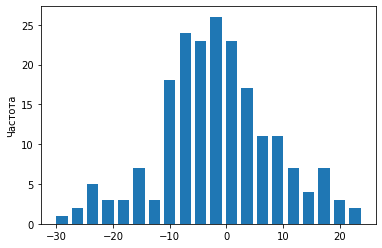

In [32]:
t = torch.histogram(torch.empty(200).normal_(mean=0, std=10), bins=20)
print(t)
plt.bar(t.bin_edges[:-1], t.hist, width=2)
plt.ylabel('Частота')
plt.show()